In [125]:
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]

from faker import Factory
from itertools import islice
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle

import pyodbc
import pysal as ps

from pysal.viz.mapclassify import Natural_Breaks as nb

from math import log10
from shapely.geometry import Point
from shapely import wkt

from IPython.display import IFrame

import folium
from folium.plugins import HeatMap

fake = Factory.create()

In [127]:
data_fout = os.path.join(os.path.dirname(os.getcwd()), 'data_out')

with open(os.path.join(data_fout, 'samples_buffered_normalised_4283.pickle'), 'rb') as f:
    samples = pickle.load(f)
    
with open(os.path.join(data_fout, 'buffers_4283.pickle'), 'rb') as f:
    buffers = pickle.load(f)

In [128]:
buffers.head()

,geometry,index,stroke
0,POLYGON ((150.3079888635762 -29.37525917739184...,0,#c13baa
1,"POLYGON ((150.339090016412 -29.39611544758894,...",0,#90cdfa
2,POLYGON ((141.7373528465147 -31.99632093655348...,0,#ce4ea4
3,POLYGON ((141.6299547726495 -31.97788901999016...,1,#56b830
4,POLYGON ((141.5933627601358 -32.09209102125658...,2,#e16597


In [129]:
samples.head()

,index,As_ppm,Au_ppm,FILEID,FILE_ID,LAT94,LNG94,RIN,RPT_ID,RPT_TYPE,...,MR_AUTHOR,MR_CONFIDENTIALITY,MR_REPYEAR,EASTING,NORTHING,Au_ppm_nn,Au_ppm_fn,Au_ppm_log,Au_ppm_nml,Coordinates_4283
0,0,NaN,0.000,NaN,109.0,-29.378209,150.282157,R00029158,29,A,...,Rio Tinto Exploration Pty Ltd,O,2003,1.558176e+06,-3.422245e+06,0.000,0.0005,-3.301030,NaN,POINT (150.282157 -29.378209)
1,0,NaN,0.000,NaN,109.0,-29.363753,150.294260,R00029158,29,A,...,Rio Tinto Exploration Pty Ltd,O,2003,1.559533e+06,-3.420825e+06,0.000,0.0005,-3.301030,NaN,POINT (150.29426 -29.363753)
2,0,NaN,0.000,NaN,109.0,-29.396065,150.313078,R00029158,29,A,...,Rio Tinto Exploration Pty Ltd,O,2003,1.560865e+06,-3.424569e+06,0.000,0.0005,-3.301030,NaN,POINT (150.313078 -29.396065)
3,0,NaN,0.000,NaN,109.0,-29.388715,150.314466,R00029158,29,A,...,Rio Tinto Exploration Pty Ltd,O,2003,1.561102e+06,-3.423788e+06,0.000,0.0005,-3.301030,NaN,POINT (150.314466 -29.388715)
4,0,2.8,0.011,NaN,252.0,-31.994859,141.710774,R00029266,32,A,...,Golden Cross Operations Pty Ltd\r\nSipa Explor...,O,2003,7.219072e+05,-3.630439e+06,0.011,0.0110,-1.958607,0.666667,POINT (141.710774 -31.994859)


In [130]:
subbuffers = buffers.cx[145:146, -31:-32]
subsamples = samples.cx[144.5:146.5, -30.5:-32.5]

In [131]:
subbuffers

,geometry,index,stroke
34,POLYGON ((146.3919076446305 -31.92796240066219...,1,#17df13
37,"POLYGON ((145.952289536513 -31.04308755599637,...",0,#fc7112
38,"POLYGON ((145.917287466965 -31.00056693337864,...",1,#2af835
48,"POLYGON ((145.9087652246193 -30.9946852840727,...",0,#5503c5
63,POLYGON ((145.9174926087724 -31.00531209105248...,0,#dffcdd
65,POLYGON ((145.9174926087724 -31.00531209105248...,1,#c91fe1
84,"POLYGON ((146.045784749486 -31.92922981443546,...",0,#d2419a
85,POLYGON ((146.0579039352188 -31.92789855840088...,0,#60ff57
105,POLYGON ((146.0455883246602 -31.92950637606027...,1,#c03fd1
106,"POLYGON ((145.924476954136 -30.99487561832992,...",0,#381cca


In [132]:
# subbuffers.plot()
subbuffers.to_file(os.path.join(data_fout, 'subbuffers.geojson'), driver ='GeoJSON')

<IPython.core.display.Javascript object>


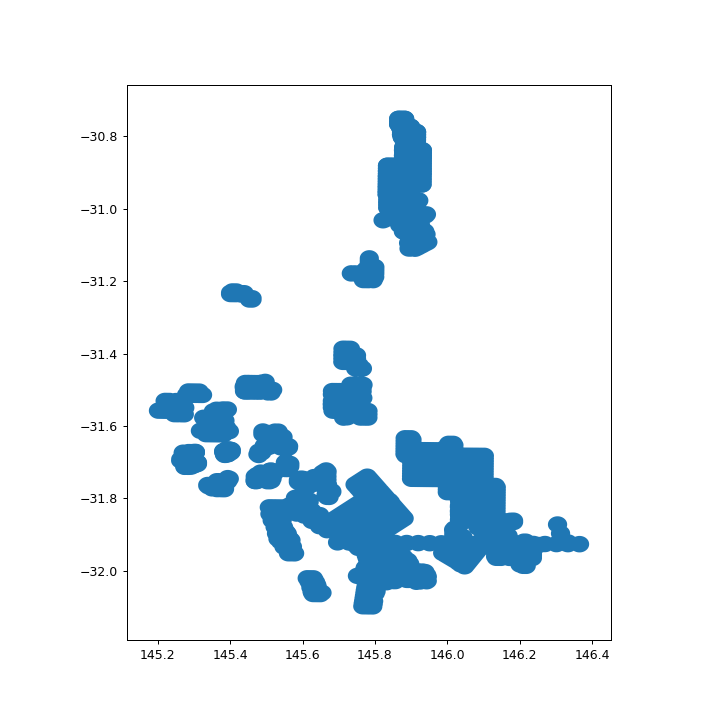

In [134]:
subbuffers.plot()

<IPython.core.display.Javascript object>


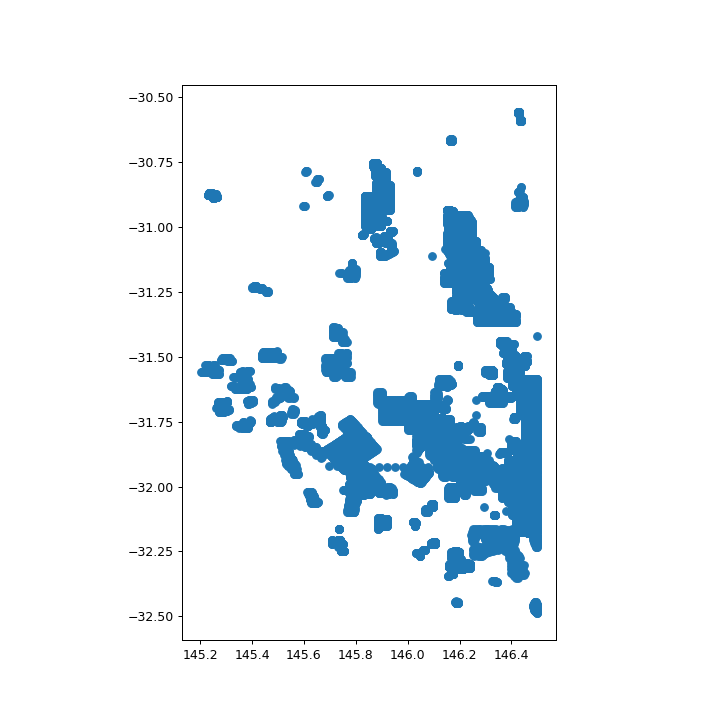

In [133]:
subsamples.plot()

In [97]:
subsamples

,index,As_ppm,Au_ppm,FILEID,FILE_ID,LAT94,LNG94,RIN,RPT_ID,RPT_TYPE,...,MR_AUTHOR,MR_CONFIDENTIALITY,MR_REPYEAR,EASTING,NORTHING,Au_ppm_nn,Au_ppm_fn,Au_ppm_log,Au_ppm_nml,Coordinates_4283
3056,1,8.200000,-0.00020,NaN,361.0,-31.924336,145.983234,R00041637,573,A,...,Robust Resource Pty Ltd.,O,2007,1.121650e+06,-3.654051e+06,-0.00020,0.00010,-4.000000,0.000000,POINT (145.983234 -31.924336)
3057,1,7.400000,-0.00020,NaN,361.0,-31.924077,145.951399,R00041637,573,A,...,Robust Resource Pty Ltd.,O,2007,1.118682e+06,-3.653738e+06,-0.00020,0.00010,-4.000000,0.000000,POINT (145.951399 -31.924077)
3058,1,8.600000,-0.00020,NaN,361.0,-31.923811,145.919563,R00041637,573,A,...,Robust Resource Pty Ltd.,O,2007,1.115714e+06,-3.653426e+06,-0.00020,0.00010,-4.000000,0.000000,POINT (145.919563 -31.923811)
3059,1,6.000000,-0.00020,NaN,361.0,-31.923536,145.887729,R00041637,573,A,...,Robust Resource Pty Ltd.,O,2007,1.112746e+06,-3.653114e+06,-0.00020,0.00010,-4.000000,0.000000,POINT (145.887729 -31.923536)
3060,1,7.200000,-0.00020,NaN,361.0,-31.923253,145.855894,R00041637,573,A,...,Robust Resource Pty Ltd.,O,2007,1.109778e+06,-3.652802e+06,-0.00020,0.00010,-4.000000,0.000000,POINT (145.855894 -31.923253)
3061,1,7.400000,-0.00020,NaN,361.0,-31.922962,145.824061,R00041637,573,A,...,Robust Resource Pty Ltd.,O,2007,1.106810e+06,-3.652489e+06,-0.00020,0.00010,-4.000000,0.000000,POINT (145.824061 -31.922962)
3062,1,12.200000,0.00040,NaN,361.0,-31.922664,145.792227,R00041637,573,A,...,Robust Resource Pty Ltd.,O,2007,1.103842e+06,-3.652176e+06,0.00040,0.00040,-3.397940,0.428843,POINT (145.792227 -31.922664)
3063,1,14.200000,-0.00020,NaN,361.0,-31.922357,145.760394,R00041637,573,A,...,Robust Resource Pty Ltd.,O,2007,1.100874e+06,-3.651863e+06,-0.00020,0.00010,-4.000000,0.000000,POINT (145.760394 -31.922357)
3064,1,13.600000,0.00040,NaN,361.0,-31.922042,145.728562,R00041637,573,A,...,Robust Resource Pty Ltd.,O,2007,1.097906e+06,-3.651551e+06,0.00040,0.00040,-3.397940,0.428843,POINT (145.728562 -31.922042)
3066,1,13.800000,-0.00020,NaN,361.0,-31.921720,145.696730,R00041637,573,A,...,Robust Resource Pty Ltd.,O,2007,1.094938e+06,-3.651238e+06,-0.00020,0.00010,-4.000000,0.000000,POINT (145.69673 -31.92172)


In [135]:
import numpy as np
froms = np.arange(0.0, 2.5, 0.1)

colours =[
'#211230',
'#45153C',
'#5C1C50',
'#732364',
'#A6358C',
'#961E2A',
'#A21812',
'#BA4200',
'#C06618',
'#C09012',
'#CCAE0C',
'#C0C012',
'#90B424',
'#6CA82A',
'#3C9024',
'#1E721E',
'#18845A',
'#248A84',
'#4E9CA8',
'#A2C6EA',
'#B1CFED',
'#C0D8F0',
'#CFE1F3',
'#DEEAF6']

In [136]:
froms
print(len(froms))
print(len(colours))

25
24


In [137]:
subsamples['Au_ppm_nml'].fillna(0, inplace=True)

In [138]:

subsamples['Au_bins'] = pd.cut(subsamples.Au_ppm_nml, froms, labels=colours, include_lowest=True)

c:\users\gatesk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
from pysal.viz.mapclassify import Natural_Breaks as nb

colour_spectrum =[
'#CEE8ED',
'#BBE9E6',
'#BDE0D2',
'#9ECB9E',
'#7FBB7F',
'#E68D3D',
'#BA4200',
'#C11C17',
'#80529A',
'#422460']

classifier = nb(subsamples['Au_ppm_nml'], 10)
subsamples['classification'] = subsamples['Au_ppm_nml'].apply(classifier)
subsamples.classification.replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], colour_spectrum, inplace=True)


c:\users\gatesk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
c:\users\gatesk\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [ ]:
# Show me the buffers !!!!
m = folium.Map(location=[-32, 141.5], zoom_start=9)

samples = folium.FeatureGroup(name="samples")

sample_points = list(zip(subsamples.LAT94.values, subsamples.LNG94.values, subsamples.Au_ppm_nml.values, subsamples.classification.values))

for lat, lng, au, colour in sample_points:
    samples.add_child(folium.CircleMarker(location=[lat, lng], radius=1,
        popup=str(au), 
        tooltip=str(au),
        fill=True,  # Set fill to True
        color=str(colour),
        fill_opacity=0.5)).add_to(m)

folium.GeoJson(os.path.join(data_fout, 'subbuffers.geojson'),
    style_function=lambda x: {
        'color' : 'grey',
        'weight' : 2,
        'opacity': 0.66,
        'fillColor' : x['properties']['stroke'],
        }).add_to(m)

# m.add_child(samples)
m.add_child(folium.LayerControl())
m.save(os.path.join(data_fout, "SUB_EXAMPLE.html"))

# IFrame(src='ALL_SAMPLES.html', width=1000, height=600)